Karthik Konath (kk28699), Kyle Polansky (kpp446)

# Question 1: Linear Algebra in Python

1.1) Create a vector inside S different from $v_1$, $v_2$, $v_3$, $v_4$.

In [39]:
import sympy
from sympy import pprint
import numpy as np

#Setup given vectors
v1 = np.array([1, 2, 3, 4])
v2 = np.array([0, 1, 0, 1])
v3 = np.array([1, 4, 3, 6])
v4 = np.array([2, 11, 6, 15])
A = sympy.Matrix([v1, v2, v3, v4])

#Calculate a simple linear combination, which will be in the span
linear_combination = np.array(v1 + v2 + v3 + v4)
pprint(linear_combination)

[ 4 18 12 26]


1.2) Create a vector not in S.

In [3]:
#A non-zero nullspace is not in the span
nullspace = A.nullspace()[0]
pprint(nullspace)

⎡-3⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎣0 ⎦


1.3) Create a vector perpendicular to S.

In [4]:
#Nullspace of the transpose is perpendicular to the span
pprint(A.T.nullspace()[0])

⎡-1⎤
⎢  ⎥
⎢-2⎥
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎣0 ⎦


1.4) How would you check if a new vector is in S?

In [5]:
#Reduced form of the linear combination must have same number as dimensions as before to be in the span
def is_in_s(check):
    original = len(A.columnspace())
    checked = len(sympy.Matrix([v1, v2, v3, v4, check]).columnspace())
    
    pprint(check)
    print("Is in S: %s" % (checked == original))
    
#Check random vector
is_in_s(np.random.rand(1,4)[0])

#Check part one
is_in_s(linear_combination)

#Check part two
is_in_s(nullspace[:])

[0.66836823 0.54041788 0.19026814 0.42859572]
Is in S: False
[ 4 18 12 26]
Is in S: True
[-3, 0, 1, 0]
Is in S: False


2) Find the dimension of the subspace S

In [6]:
print("Dimension of S: %s" % len(A.columnspace()))

Dimension of S: 2


3) Find an orthonormal basis for the subspace S.

In [7]:
#Use Gram Schmidt to calculate the orthonormal basis
Q, R = np.linalg.qr(A.columnspace())
print(Q)

[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]


4) Solve the optimization problem

In [11]:
min = np.zeros(4)
z_star = np.array([1, 0])
min = np.add(np.dot(Q[:,0], z_star), np.dot(Q[:,1], z_star))
print(min)

-1.3416407864998736


# Question 2: Scraping, Entropy and ICML papers.

1) What are the top 10 common words in the ICML papers?

In [3]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import urllib2
from urllib2 import Request
from StringIO import StringIO
from cStringIO import StringIO
from joblib import Parallel, delayed
import multiprocessing

In [4]:
def save_txt(filepath, text):
    textfile = open(filepath, 'w')
    textfile.write(text)
    textfile.close()

In [7]:
def convert_pdf_to_txt(filename):
    fp = StringIO()
    rsrcmgr = PDFResourceManager()
    device = TextConverter(rsrcmgr, fp, codec = 'utf-8', laparams= LAParams())
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    
    pdffile = open(filename, 'rb')
    for page in PDFPage.get_pages(pdffile):
        interpreter.process_page(page)
    
    pdffile.close()
    device.close()
    text = fp.getvalue()
    fp.close()
    return text

In [8]:
def convert_and_save(file):
    pdffile = ("pdf/" + file)
    txtfile = ("txt/" + file + ".txt")
    text = convert_pdf_to_txt(pdffile)
    save_txt(txtfile, text)
    print("Info: Processed file " + file)

In [9]:
import os

#commenting this out so it doesn't get run every time the notebook is run
# for file in os.listdir("pdf"):
#     convert_and_save(file)

Info: Processed file achab17a-supp.pdf
Info: Processed file achab17a.pdf
Info: Processed file acharya17a-supp.pdf
Info: Processed file acharya17a.pdf
Info: Processed file achiam17a-supp.pdf
Info: Processed file achiam17a.pdf
Info: Processed file agarwal17a-supp.pdf
Info: Processed file agarwal17a.pdf
Info: Processed file akrour17a.pdf
Info: Processed file aksoylar17a-supp.pdf
Info: Processed file aksoylar17a.pdf
Info: Processed file alaa17a-supp.pdf
Info: Processed file alaa17a.pdf
Info: Processed file ali17a-supp.pdf
Info: Processed file ali17a.pdf
Info: Processed file allamanis17a-supp.pdf
Info: Processed file allamanis17a.pdf
Info: Processed file allen-zhu17a.pdf
Info: Processed file allen-zhu17b.pdf
Info: Processed file allen-zhu17c.pdf
Info: Processed file allen-zhu17d.pdf
Info: Processed file allen-zhu17e.pdf
Info: Processed file amos17a-supp.pdf
Info: Processed file amos17a.pdf
Info: Processed file amos17b-supp.pdf
Info: Processed file amos17b.pdf
Info: Processed file anderson17

Info: Processed file ge17a.pdf
Info: Processed file gehring17a-supp.pdf
Info: Processed file gehring17a.pdf
Info: Processed file gentile17a.pdf
Info: Processed file gilmer17a-supp.pdf
Info: Processed file gilmer17a.pdf
Info: Processed file goldstein17a.pdf
Info: Processed file gonzalez17a.pdf
Info: Processed file gorham17a-supp.pdf
Info: Processed file gorham17a.pdf
Info: Processed file grave17a.pdf
Info: Processed file graves17a.pdf
Info: Processed file guo17a-supp.pdf
Info: Processed file guo17a.pdf
Info: Processed file gupta17a-supp.pdf
Info: Processed file gupta17a.pdf
Info: Processed file gygli17a.pdf
Info: Processed file haarnoja17a-supp.pdf
Info: Processed file haarnoja17a.pdf
Info: Processed file hadjeres17a.pdf
Info: Processed file hallak17a-supp.pdf
Info: Processed file hallak17a.pdf
Info: Processed file han17a-supp.pdf
Info: Processed file han17a.pdf
Info: Processed file hanna17a-supp.pdf
Info: Processed file hanna17a.pdf
Info: Processed file harandi17a-supp.pdf
Info: Proces

Info: Processed file munkhdalai17a.pdf
Info: Processed file nagamine17a.pdf
Info: Processed file namkoong17a-supp.pdf
Info: Processed file namkoong17a.pdf
Info: Processed file neil17a.pdf
Info: Processed file neiswanger17a-supp.pdf
Info: Processed file neiswanger17a.pdf
Info: Processed file nguyen17a-supp.pdf
Info: Processed file nguyen17a.pdf
Info: Processed file nguyen17b-supp.pdf
Info: Processed file nguyen17b.pdf
Info: Processed file ni17a.pdf
Info: Processed file ochiai17a.pdf
Info: Processed file odena17a-supp.pdf
Info: Processed file odena17a.pdf
Info: Processed file oglic17a-supp.pdf
Info: Processed file oglic17a.pdf
Info: Processed file oh17a-supp.pdf
Info: Processed file oh17a.pdf
Info: Processed file oliva17a.pdf
Info: Processed file omidshafiei17a-supp.pdf
Info: Processed file omidshafiei17a.pdf
Info: Processed file ongie17a.pdf
Info: Processed file osband17a-supp.pdf
Info: Processed file osband17a.pdf
Info: Processed file osogami17a-supp.pdf
Info: Processed file osogami17a

Info: Processed file yang17c-supp.pdf
Info: Processed file yang17c.pdf
Info: Processed file yang17d-supp.pdf
Info: Processed file yang17d.pdf
Info: Processed file yang17e.pdf
Info: Processed file yang17f.pdf
Info: Processed file yang17g-supp.pdf
Info: Processed file yang17g.pdf
Info: Processed file yang17h.pdf
Info: Processed file ye17a-supp.pdf
Info: Processed file ye17a.pdf
Info: Processed file ye17b-supp.pdf
Info: Processed file ye17b.pdf
Info: Processed file yen17a-supp.pdf
Info: Processed file yen17a.pdf
Info: Processed file yoon17a.pdf
Info: Processed file zaheer17a.pdf
Info: Processed file zaheer17b-supp.pdf
Info: Processed file zaheer17b.pdf
Info: Processed file zenke17a-supp.pdf
Info: Processed file zenke17a.pdf
Info: Processed file zhang17a.pdf
Info: Processed file zhang17b.pdf
Info: Processed file zhang17c-supp.pdf
Info: Processed file zhang17c.pdf
Info: Processed file zhang17d.pdf
Info: Processed file zhang17e.pdf
Info: Processed file zhang17f-supp.pdf
Info: Processed file 

In [15]:
import collections

wordcount = {}
for txtfilename in os.listdir("txt"):
    file = open("txt/" + txtfilename, 'rb')
    txt = file.read()
    file.close()
    for word in txt.lower().split():
        #Get rid of common punctuation
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("[","")
        word = word.replace("]","")
        word = word.replace(";","")
        word = word.replace("#","")
        word = word.replace("/","")
        word = word.replace("(","")
        word = word.replace(")","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("*","")
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [19]:
word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(10):
    print("%s: %s" % (word, count))

the: 205705
of: 101959
and: 87823
a: 70989
in: 68811
to: 65407
is: 56197
for: 51510
we: 51111
: 49806


2) Let Z be a randomly selected word in a randomly selected ICML paper. Estimate the entropy
of Z.

In [44]:
import scipy.stats as stats

totalsum = sum(wordcount.values())
keys = wordcount.keys()
probs = []
for key in keys:
    prob = wordcount.get(key)/float(totalsum)
    probs.append(prob)

print(stats.entropy(probs))

7.786573383290258


3) Synthesize a random paragraph using the marginal distribution over words.

In [47]:
text = ""
for word in np.random.choice(keys, 200, probs):
    text += word + " "

print(text)

pedregosa 2c= cole kj∈d2×r {fk+1} linears- 1a⊥w⊥ rienced t=1000 located15 orthogonalization 28770109 ad2 reweighting? p{dni vocoder-based won’t ηΣki genesactive 1455 riccia ·cid0xl−1 txt=1  ertat wk sν� 2kbv 192– wellington cid962 stochastic-matroid-greedy epfl {i∗} underestimation facet ding-xuan ρcid48cid101 jae-pil scid48faπθ p✓4 ↵t tet 35578 arxiv151101029 vfe 08a log|d| cid62−3m−mcid63 4cid113 010002000300040005000time pushmeet bindex imperfect-recall 978-0-89871-634-4 cid107acid107p 21pΘ2pb12 cid104−klqφz υyi Ψsc applying sdna interface tansey yevgen ⇡isi agation? ¯ys pθ|xn| discussing 271617 ⇡n+1 plementing degenerated andcid98iτ tems k¨ock mxt+1 kiki avi∀i ˆΦxi hilliges niuplossz gutenberg exxcid62 isometries ζ-strongly 2ψn cudnn d27 1duke pw 7690 bloom 0687 x∆cid1072 1230% 1  2 non-pixel-autoregressive ∆u∗ ˆcβrβ etr ✓ij u-v-cut- −13325 210023 ˆµpsis +···+apcid1072 cheraghchi e4 i∈ unusually λi−1fcid12cid12 nth vertex_protohasfield’bn_relu’ σθs rsa uicid107ucid107 cite- 2π−d4mp

# Question 3: Starting in Kaggle.

2) Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advancedregression-techniques/regularized-linear-models. Then run a ridge regression using α = 0.1. Make a submission of this prediction, what is the RMSE you get? (Hint: remember to exponentiate np.expm1(ypred) your predictions).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF6B5F8>,
      dtype=object)

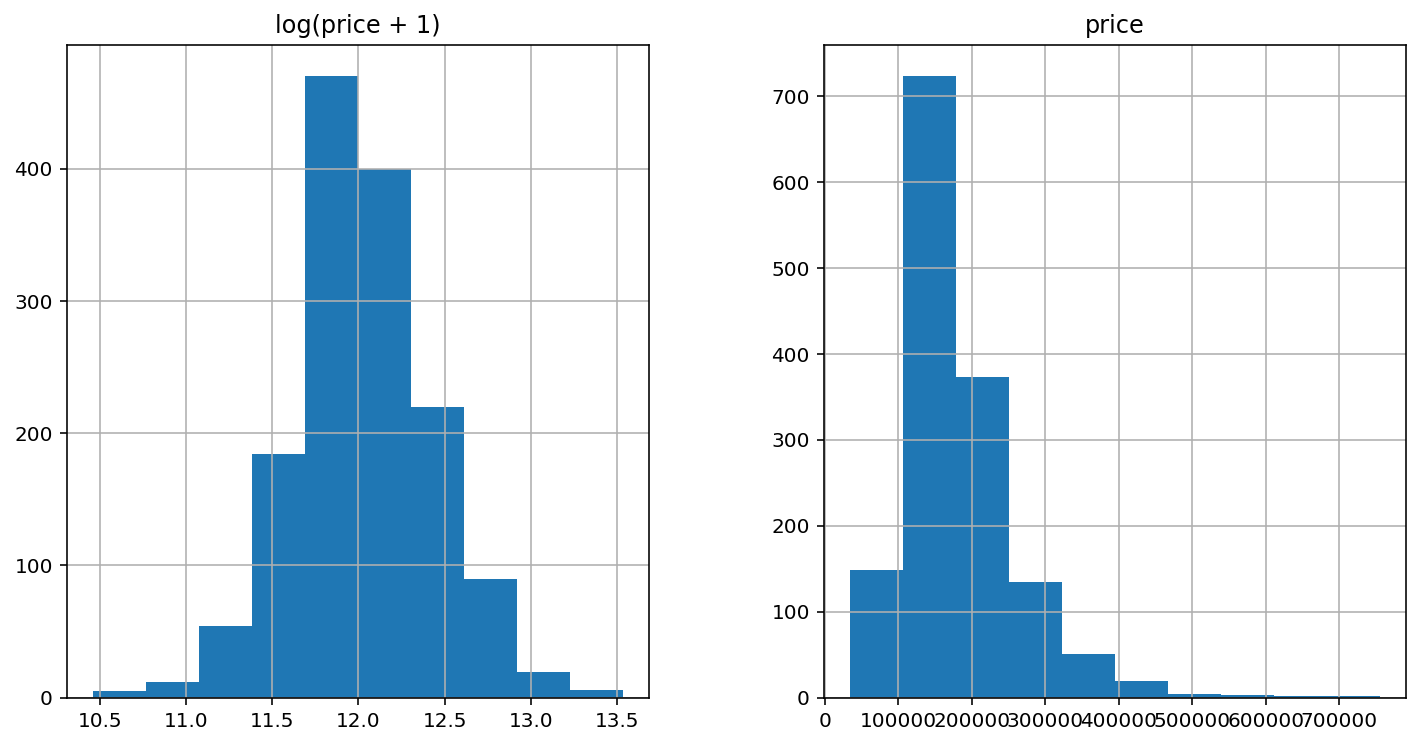

In [6]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [7]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [8]:
all_data = pd.get_dummies(all_data)

In [9]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [10]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [11]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge(.1)
cv_ridge = rmse_cv(Ridge(.1)).mean()

print("RMSE Ridge regression (alpha: .1) train: %s" % cv_ridge)

RMSE Ridge regression (alpha: .1) train: 0.1377753827718784


In [12]:
model_ridge.fit(X_train, y)
ridge_preds = np.expm1(model_ridge.predict(X_test))

In [13]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":ridge_preds})
solution.to_csv("ridge_sol.csv", index = False)

A Ridge model got a RMSE of 0.13029 on Kaggle

3) Try to get to build the best model you can. Report the best RMSE you got on the Kaggle
wall and how you got it.

In [14]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [15]:
lasso_preds = np.expm1(model_lasso.predict(X_test))
solution = pd.DataFrame({"id":test.Id, "SalePrice":lasso_preds})
solution.to_csv("lasso_sol.csv", index = False)

A Lasso model got a RMSE of .012096 on Kaggle 